In [1]:
import torch
import timm
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models

In [2]:

import os
from collections import defaultdict
import shutil

# Path dataset mentah
source_dir = '/kaggle/input/fish-species-image-data/Fish_Data/images/raw_images'
# Path untuk menyimpan dataset yang sudah difilter
filtered_dir = '/kaggle/working/filter_genus'

# Dictionary untuk menghitung jumlah file per genus
genus_count = defaultdict(list)

# Loop untuk membaca file dalam direktori sumber
for filename in os.listdir(source_dir):
    # Lewati jika bukan file gambar
    if not filename.endswith(('.jpg', '.jpeg', '.png')):
        continue

    # Ambil nama genus (kata pertama sebelum underscore "_")
    genus = filename.split('_')[0].lower()
    
    # Tambahkan file ke list genus
    genus_count[genus].append(filename)

# Buat folder filtered_dataset jika belum ada
os.makedirs(filtered_dir, exist_ok=True)

# Filter genus dengan jumlah data > 100 dan salin file ke folder baru
for genus, files in genus_count.items():
    if len(files) > 100:
        # Buat folder untuk genus
        genus_folder = os.path.join(filtered_dir, genus)
        os.makedirs(genus_folder, exist_ok=True)
        
        # Salin file ke folder genus
        for file in files:
            shutil.copy(os.path.join(source_dir, file), os.path.join(genus_folder, file))

print("Dataset difilter dan disimpan di:", filtered_dir)

Dataset difilter dan disimpan di: /kaggle/working/filter_genus


Tabel Jumlah Data per Genus:
Genus                Jumlah Gambar
------------------------------
bodianus             125       
cephalopholis        133       
epinephelus          287       
halichoeres          213       
lethrinus            160       
lutjanus             319       
pseudanthias         187       
thalassoma           130       


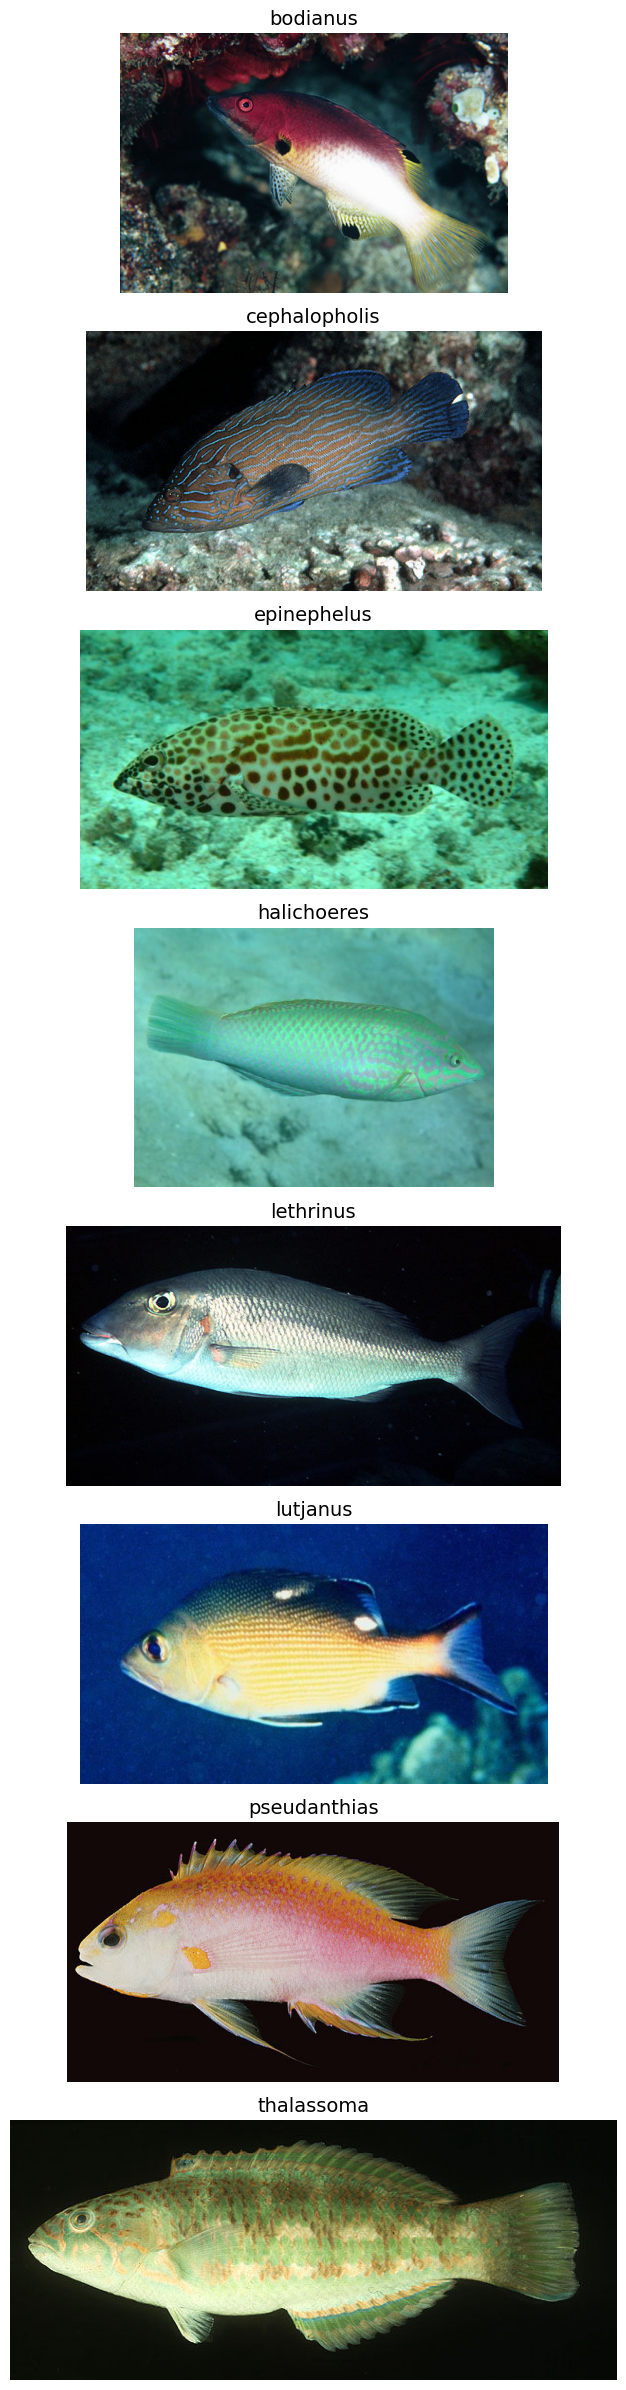

Gambar hasil gabungan telah disimpan di: /kaggle/working/genus_examples.png


In [3]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Periksa apakah folder filter ada
filtered_dir = '/kaggle/working/filter_genus'
if not os.path.exists(filtered_dir):
    print("Folder filter tidak ditemukan. Pastikan Anda telah memfilter dataset.")
else:
    genus_data = []  # Menyimpan data genus dan jumlah file
    images_to_plot = []  # Menyimpan gambar dan nama genus untuk digabung
    
    # Loop melalui setiap folder genus di folder filter
    for genus in sorted(os.listdir(filtered_dir)):
        genus_path = os.path.join(filtered_dir, genus)
        
        # Periksa apakah ini folder (bukan file lain)
        if os.path.isdir(genus_path):
            # Ambil daftar file gambar dalam folder genus
            image_files = [f for f in os.listdir(genus_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
            num_files = len(image_files)
            
            # Simpan data genus
            genus_data.append((genus, num_files))
            
            if num_files > 0:
                # Ambil file gambar pertama untuk ditampilkan
                example_image_path = os.path.join(genus_path, image_files[0])
                img = imread(example_image_path)
                images_to_plot.append((genus, img))
    
    # Menampilkan tabel data genus
    print("Tabel Jumlah Data per Genus:")
    print("{:<20} {:<10}".format("Genus", "Jumlah Gambar"))
    print("-" * 30)
    for genus, count in genus_data:
        print(f"{genus:<20} {count:<10}")
    
    # Membuat plot gabungan untuk semua gambar
    fig, axes = plt.subplots(nrows=len(images_to_plot), ncols=1, figsize=(8, len(images_to_plot) * 3))
    if len(images_to_plot) == 1:
        axes = [axes]  # Jika hanya satu genus, konversi ke list agar bisa diiterasi
    for ax, (genus, img) in zip(axes, images_to_plot):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(genus, fontsize=14)
    
    # Simpan gambar hasil gabungan
    output_path = '/kaggle/working/genus_examples.png'
    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()
    
    print(f"Gambar hasil gabungan telah disimpan di: {output_path}")


In [4]:
import os
from PIL import Image
from torchvision import transforms
import random
import shutil

# Path ke folder hasil filter
filtered_dir = '/kaggle/working/filter_genus'
augmented_dir = '/kaggle/working/dataset_augmentasi'

# Buat folder augmented_dataset 
os.makedirs(augmented_dir, exist_ok=True)

# Definisi transformasi augmentasi
augmentation_transforms = transforms.Compose([
    transforms.RandomRotation(degrees=15),  # Rotasi kecil hingga ±15 derajat
    transforms.RandomResizedCrop(size=(224, 224), scale=(0.9, 1.1)),  # Scaling 10-20%
    transforms.RandomHorizontalFlip(p=0.5),  # Membalik secara horizontal
    transforms.ColorJitter(brightness=0.2, contrast=0.2),  # Penyesuaian brightness/contrast
])

# Proses augmentasi
for genus in os.listdir(filtered_dir):
    genus_path = os.path.join(filtered_dir, genus)
    if os.path.isdir(genus_path):
        genus_augmented_path = os.path.join(augmented_dir, genus)
        os.makedirs(genus_augmented_path, exist_ok=True)

        # Ambil semua file gambar dalam folder genus
        images = [f for f in os.listdir(genus_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
        num_images = len(images)

        # Augmentasi jika jumlah gambar kurang dari 500
        if num_images < 350:
            print(f"Mengaugmentasi genus: {genus}")
            for i in range(500 - num_images):
                # Pilih gambar acak dari dataset
                random_image = random.choice(images)
                image_path = os.path.join(genus_path, random_image)

                # Buka gambar dan terapkan transformasi
                with Image.open(image_path) as img:
                    img = img.convert('RGB')  # Pastikan gambar dalam format RGB
                    augmented_img = augmentation_transforms(img)

                    # Simpan gambar hasil augmentasi
                    augmented_img.save(os.path.join(genus_augmented_path, f"{genus}_aug_{i}.jpg"))

        # Salin gambar asli ke folder augmented_dataset
        for image in images:
            original_image_path = os.path.join(genus_path, image)
            shutil.copy(original_image_path, os.path.join(genus_augmented_path, image))

print("Augmentasi selesai. Dataset baru disimpan di:", augmented_dir)


Mengaugmentasi genus: lutjanus


Mengaugmentasi genus: lethrinus


Mengaugmentasi genus: thalassoma


Mengaugmentasi genus: epinephelus


Mengaugmentasi genus: pseudanthias


Mengaugmentasi genus: halichoeres


Mengaugmentasi genus: cephalopholis


Mengaugmentasi genus: bodianus


Augmentasi selesai. Dataset baru disimpan di: /kaggle/working/dataset_augmentasi


In [5]:
import os

# Path ke folder hasil augmentasi
augmented_dir = '/kaggle/working/dataset_augmentasi'

# Periksa apakah folder augmentasi ada
if not os.path.exists(augmented_dir):
    print(f"Folder {augmented_dir} tidak ditemukan. Pastikan Anda telah melakukan augmentasi dataset.")
else:
    print("Jumlah Data per Genus di Folder Augmentasi:")
    # Loop melalui setiap folder genus di folder augmentasi
    for genus in sorted(os.listdir(augmented_dir)):
        genus_path = os.path.join(augmented_dir, genus)
        # Periksa apakah ini folder (bukan file lain)
        if os.path.isdir(genus_path):
            # Hitung jumlah file dalam folder genus
            num_files = len([f for f in os.listdir(genus_path) if f.endswith(('.jpg', '.jpeg', '.png'))])
            print(f"{genus}: {num_files}")


Jumlah Data per Genus di Folder Augmentasi:
bodianus: 500
cephalopholis: 500
epinephelus: 500
halichoeres: 500
lethrinus: 500
lutjanus: 500
pseudanthias: 500
thalassoma: 500


In [6]:
import os
import shutil
import random

# Path ke folder hasil augmentasi
augmented_dir = '/kaggle/working/dataset_augmentasi'
output_dir = '/kaggle/working/split_dataset'

# Persentase split data
train_split = 0.7
val_split = 0.2
test_split = 0.1

# Buat folder output jika belum ada
os.makedirs(output_dir, exist_ok=True)
train_dir = os.path.join(output_dir, 'train')
os.makedirs(train_dir, exist_ok=True)
val_dir = os.path.join(output_dir, 'val')
os.makedirs(val_dir, exist_ok=True)
test_dir = os.path.join(output_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

# Split data untuk setiap genus
for genus in os.listdir(augmented_dir):
    genus_path = os.path.join(augmented_dir, genus)
    if os.path.isdir(genus_path):
        # Buat folder genus di masing-masing split
        train_genus_dir = os.path.join(train_dir, genus)
        val_genus_dir = os.path.join(val_dir, genus)
        test_genus_dir = os.path.join(test_dir, genus)
        os.makedirs(train_genus_dir, exist_ok=True)
        os.makedirs(val_genus_dir, exist_ok=True)
        os.makedirs(test_genus_dir, exist_ok=True)

        # Dapatkan daftar semua file gambar di folder genus
        images = [f for f in os.listdir(genus_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
        random.shuffle(images)  # Acak urutan file

        # Hitung jumlah data untuk setiap split
        total_images = len(images)
        train_count = int(total_images * train_split)
        val_count = int(total_images * val_split)
        test_count = total_images - train_count - val_count

        # Pindahkan file ke folder masing-masing
        for i, image in enumerate(images):
            src_path = os.path.join(genus_path, image)
            if i < train_count:
                shutil.copy(src_path, os.path.join(train_genus_dir, image))
            elif i < train_count + val_count:
                shutil.copy(src_path, os.path.join(val_genus_dir, image))
            else:
                shutil.copy(src_path, os.path.join(test_genus_dir, image))

print("Split dataset selesai. Dataset baru disimpan di:", output_dir)


Split dataset selesai. Dataset baru disimpan di: /kaggle/working/split_dataset


In [7]:

# Ukuran batch
bs = 32

# Transformasi untuk train dataset
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(299),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# Transformasi untuk validation dataset
transform_validation = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# Transformasi untuk test dataset (biasanya sama dengan validation)
transform_test = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# Dataset untuk train, validation, dan test
train_dataset = datasets.ImageFolder('/kaggle/working/split_dataset/train', transform=transform_train)
validation_dataset = datasets.ImageFolder('/kaggle/working/split_dataset/val', transform=transform_validation)
test_dataset = datasets.ImageFolder('/kaggle/working/split_dataset/test', transform=transform_test)

# DataLoader untuk train, validation, dan test
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=bs, shuffle=True, num_workers=4)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=bs, shuffle=False, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=bs, shuffle=False, num_workers=4)

# Menampilkan beberapa informasi tentang dataset
print(f"Jumlah data train: {len(train_dataset)}")
print(f"Jumlah data validation: {len(validation_dataset)}")
print(f"Jumlah data test: {len(test_dataset)}")


Jumlah data train: 2800
Jumlah data validation: 800
Jumlah data test: 400


In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [9]:
torch.cuda.empty_cache()

In [10]:
num_classes = train_dataset.classes

In [11]:
num_classes

['bodianus',
 'cephalopholis',
 'epinephelus',
 'halichoeres',
 'lethrinus',
 'lutjanus',
 'pseudanthias',
 'thalassoma']

In [12]:
# Menggunakan model yang tersedia di PyTorch Hub
model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v3_small', pretrained=True)

# Memastikan bahwa model berhasil dimuat
print(model)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth


  0%|          | 0.00/9.83M [00:00<?, ?B/s]

 51%|█████     | 5.00M/9.83M [00:00<00:00, 52.4MB/s]

100%|██████████| 9.83M/9.83M [00:00<00:00, 65.7MB/s]

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

In [13]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params}")

Total parameters: 2542856


In [14]:
# Mendapatkan jumlah fitur input untuk layer terakhir pada classifier
num_features = model.classifier[3].in_features

# Mengganti layer terakhir classifier dengan layer baru sesuai jumlah kelas
model.classifier[3] = nn.Linear(num_features, 8)  # Misalnya 11 adalah jumlah kelas


In [15]:
from torch.optim import lr_scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

#Mendefinisikan Learning Rate Scheduler
scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [16]:
model = model.to(device)

In [17]:
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# Training loop with Early Stopping and Plotting
num_epochs = 20
best_validation_loss = float('inf')
patience = 5  # Menentukan berapa lama untuk menunggu tanpa perbaikan
counter = 0  # Counter untuk melacak epoch tanpa perbaikan

# Lists to store training loss, validation loss, training accuracy, and validation accuracy
train_loss_list = []
validation_loss_list = []
train_accuracy_list = []
validation_accuracy_list = []

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        
        # Dapatkan logits dari model
        outputs = model(inputs)
        
        # Hitung loss
        loss = criterion(outputs, labels)
        
        # Lakukan backpropagation dan optimasi
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

        # Hitung accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    average_train_loss = total_train_loss / len(train_loader)
    accuracy_train = correct_train / total_train

    # Validation
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        total_validation_loss = 0.0
        for inputs, labels in validation_loader:
            inputs, labels = inputs.to(device), labels.to(device)
        
            # Dapatkan logits dari model
            outputs = model(inputs)
        
            # Hitung loss
            validation_loss = criterion(outputs, labels)
            total_validation_loss += validation_loss.item()

            # Hitung accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    average_validation_loss = total_validation_loss / len(validation_loader)
    accuracy = correct / total

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {average_train_loss:.4f}, Train Accuracy: {accuracy_train:.4f}, Validation Loss: {average_validation_loss:.4f}, Validation Accuracy: {accuracy:.4f}')

    # Save metrics for plotting
    train_loss_list.append(average_train_loss)
    validation_loss_list.append(average_validation_loss)
    train_accuracy_list.append(accuracy_train)
    validation_accuracy_list.append(accuracy)

    # Implementasi Early Stopping
    if average_validation_loss < best_validation_loss:
        best_validation_loss = average_validation_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f'Early stopping at epoch {epoch+1}')
            break

Epoch 1/20, Train Loss: 0.9138, Train Accuracy: 0.6857, Validation Loss: 1.8648, Validation Accuracy: 0.5775


Epoch 2/20, Train Loss: 0.4734, Train Accuracy: 0.8421, Validation Loss: 0.5044, Validation Accuracy: 0.8600


Epoch 3/20, Train Loss: 0.3895, Train Accuracy: 0.8718, Validation Loss: 0.5977, Validation Accuracy: 0.8313


Epoch 4/20, Train Loss: 0.3047, Train Accuracy: 0.8950, Validation Loss: 0.3236, Validation Accuracy: 0.8962


Epoch 5/20, Train Loss: 0.2818, Train Accuracy: 0.9018, Validation Loss: 0.2184, Validation Accuracy: 0.9387


Epoch 6/20, Train Loss: 0.2400, Train Accuracy: 0.9193, Validation Loss: 0.2211, Validation Accuracy: 0.9425


Epoch 7/20, Train Loss: 0.2211, Train Accuracy: 0.9325, Validation Loss: 0.2289, Validation Accuracy: 0.9237


Epoch 8/20, Train Loss: 0.2180, Train Accuracy: 0.9271, Validation Loss: 0.1956, Validation Accuracy: 0.9437


Epoch 9/20, Train Loss: 0.1959, Train Accuracy: 0.9300, Validation Loss: 0.2802, Validation Accuracy: 0.9125


Epoch 10/20, Train Loss: 0.2034, Train Accuracy: 0.9311, Validation Loss: 0.4494, Validation Accuracy: 0.8850


Epoch 11/20, Train Loss: 0.1802, Train Accuracy: 0.9425, Validation Loss: 0.1062, Validation Accuracy: 0.9688


Epoch 12/20, Train Loss: 0.1747, Train Accuracy: 0.9454, Validation Loss: 0.2509, Validation Accuracy: 0.9313


Epoch 13/20, Train Loss: 0.1744, Train Accuracy: 0.9425, Validation Loss: 0.2857, Validation Accuracy: 0.9325


Epoch 14/20, Train Loss: 0.1673, Train Accuracy: 0.9450, Validation Loss: 0.4565, Validation Accuracy: 0.9087


Epoch 15/20, Train Loss: 0.1808, Train Accuracy: 0.9375, Validation Loss: 0.2507, Validation Accuracy: 0.9487


Epoch 16/20, Train Loss: 0.1200, Train Accuracy: 0.9621, Validation Loss: 0.1999, Validation Accuracy: 0.9350
Early stopping at epoch 16


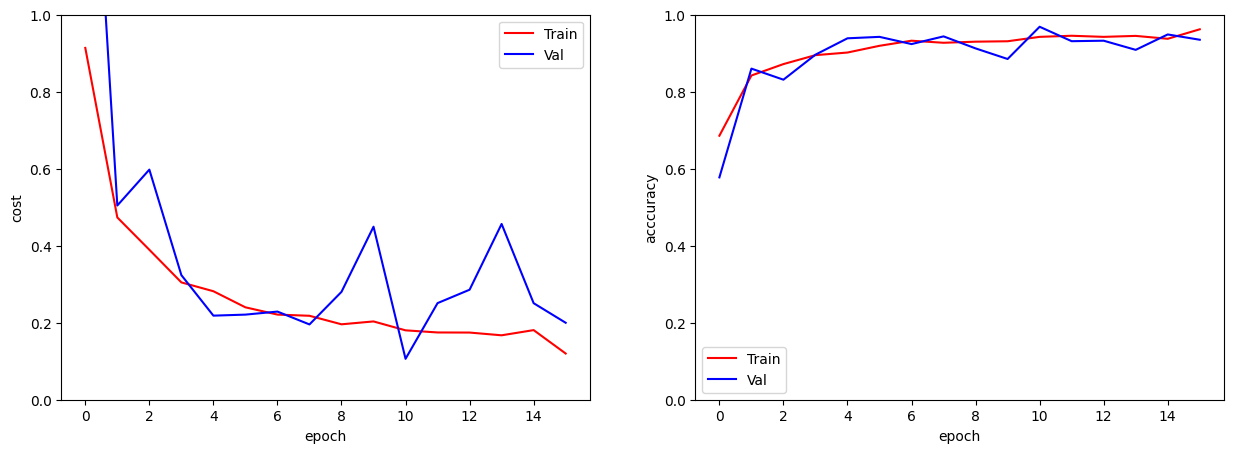

In [19]:
#Plotting
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(train_loss_list, 'r-', label='Train')
plt.plot(validation_loss_list, 'b-', label='Val')
plt.xlabel("epoch"); plt.ylabel("cost"); plt.legend();
plt.ylim(0, 1)
plt.subplot(122)
plt.plot(train_accuracy_list, 'r-', label='Train')
plt.plot(validation_accuracy_list, 'b-', label='Val')
plt.xlabel("epoch"); plt.ylabel("acccuracy"); plt.legend();
plt.ylim(0, 1)

# Atur resolusi DPI saat menyimpan gambar
plt.savefig('/kaggle/working/mobilnetv3-small_adapption.png', dpi=600)

# Tampilkan plot jika diperlukan
plt.show()

In [20]:
for param in model.classifier[3].parameters():
    param.requires_grad = True

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)

In [21]:
# Training loop with Early Stopping and Plotting
num_epochs = 100
best_validation_loss = float('inf')
patience = 10  # Menentukan berapa lama untuk menunggu tanpa perbaikan
counter = 0  # Counter untuk melacak epoch tanpa perbaikan

# Lists to store training loss, validation loss, training accuracy, and validation accuracy
train_loss_list = []
validation_loss_list = []
train_accuracy_list = []
validation_accuracy_list = []

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        
        # Dapatkan logits dari model
        outputs = model(inputs)
        
        # Hitung loss
        loss = criterion(outputs, labels)
        
        # Lakukan backpropagation dan optimasi
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

        # Hitung accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    average_train_loss = total_train_loss / len(train_loader)
    accuracy_train = correct_train / total_train

    # Validation
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        total_validation_loss = 0.0
        for inputs, labels in validation_loader:
            inputs, labels = inputs.to(device), labels.to(device)
        
            # Dapatkan logits dari model
            outputs = model(inputs)
        
            # Hitung loss
            validation_loss = criterion(outputs, labels)
            total_validation_loss += validation_loss.item()

            # Hitung accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    average_validation_loss = total_validation_loss / len(validation_loader)
    accuracy = correct / total

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {average_train_loss:.4f}, Train Accuracy: {accuracy_train:.4f}, Validation Loss: {average_validation_loss:.4f}, Validation Accuracy: {accuracy:.4f}')

    # Save metrics for plotting
    train_loss_list.append(average_train_loss)
    validation_loss_list.append(average_validation_loss)
    train_accuracy_list.append(accuracy_train)
    validation_accuracy_list.append(accuracy)

    # Implementasi Early Stopping
    if average_validation_loss < best_validation_loss:
        best_validation_loss = average_validation_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f'Early stopping at epoch {epoch+1}')
            break

Epoch 1/100, Train Loss: 0.1390, Train Accuracy: 0.9536, Validation Loss: 0.1202, Validation Accuracy: 0.9688


Epoch 2/100, Train Loss: 0.1415, Train Accuracy: 0.9518, Validation Loss: 0.1084, Validation Accuracy: 0.9725


Epoch 3/100, Train Loss: 0.1247, Train Accuracy: 0.9582, Validation Loss: 0.1051, Validation Accuracy: 0.9712


Epoch 4/100, Train Loss: 0.1081, Train Accuracy: 0.9629, Validation Loss: 0.1007, Validation Accuracy: 0.9725


Epoch 5/100, Train Loss: 0.1100, Train Accuracy: 0.9625, Validation Loss: 0.1000, Validation Accuracy: 0.9750


Epoch 6/100, Train Loss: 0.1115, Train Accuracy: 0.9661, Validation Loss: 0.1002, Validation Accuracy: 0.9750


Epoch 7/100, Train Loss: 0.1212, Train Accuracy: 0.9589, Validation Loss: 0.0982, Validation Accuracy: 0.9750


Epoch 8/100, Train Loss: 0.1205, Train Accuracy: 0.9639, Validation Loss: 0.0970, Validation Accuracy: 0.9738


Epoch 9/100, Train Loss: 0.0959, Train Accuracy: 0.9700, Validation Loss: 0.0957, Validation Accuracy: 0.9738


Epoch 10/100, Train Loss: 0.0872, Train Accuracy: 0.9696, Validation Loss: 0.0942, Validation Accuracy: 0.9762


Epoch 11/100, Train Loss: 0.0893, Train Accuracy: 0.9707, Validation Loss: 0.0943, Validation Accuracy: 0.9762


Epoch 12/100, Train Loss: 0.0799, Train Accuracy: 0.9732, Validation Loss: 0.0967, Validation Accuracy: 0.9750


Epoch 13/100, Train Loss: 0.0910, Train Accuracy: 0.9707, Validation Loss: 0.0967, Validation Accuracy: 0.9750


Epoch 14/100, Train Loss: 0.0986, Train Accuracy: 0.9707, Validation Loss: 0.0965, Validation Accuracy: 0.9775


Epoch 15/100, Train Loss: 0.0851, Train Accuracy: 0.9721, Validation Loss: 0.0954, Validation Accuracy: 0.9775


In [ ]:
#Plotting
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(train_loss_list, 'r-', label='Train')
plt.plot(validation_loss_list, 'b-', label='Val')
plt.xlabel("epoch"); plt.ylabel("cost"); plt.legend();
#plt.ylim(0, 1)
plt.subplot(122)
plt.plot(train_accuracy_list, 'r-', label='Train')
plt.plot(validation_accuracy_list, 'b-', label='Val')
plt.xlabel("epoch"); plt.ylabel("acccuracy"); plt.legend();
#plt.ylim(0, 1)

plt.savefig('/kaggle/working/MobilNetv3Small_Adapption2', dpi=600)

# Tampilkan plot jika diperlukan
plt.show()

In [ ]:
inputs, labels = next(iter(validation_loader))
inputs, labels = inputs.to(device), labels.to(device)

In [ ]:
with torch.no_grad():
    model.eval()
    output = model(inputs)
    preds = output.argmax(1)
preds

In [ ]:
#inverse Images
def inverse_norm(img):
    img[0, :, :] = img[0, :, :] = 0.229 + 0.485
    img[1, :, :] = img[1, :, :] = 0.224 + 0.456
    img[2, :, :] = img[2, :, :] = 0.225 + 0.406
    return img

In [ ]:
#plot images hasil prediksi
fig, axes = plt.subplots(6, 6, figsize=(24, 24))
for image, label, pred, ax in zip(inputs, labels, preds, axes.flatten()):
    ax.imshow(image.permute(1, 2, 0).cpu())
    font = {"color": 'r'} if label != pred else {"color": 'g'}
    label, pred =num_classes[label.item()], num_classes[pred.item()]
    ax.set_title(f"L: {label} | p: {pred}", fontdict=font);
    ax.axis('off');

# Simpan gambar ke file
plt.tight_layout()  # Sesuaikan layout untuk menghindari overlap
plt.savefig('/kaggle/working/prediction_results2.png', dpi=300)  # Simpan gambar sebagai PNG dengan resolusi 300 dpi
plt.show()  # Tampilkan gambar pada output (opsional)

In [ ]:
torch.save(model.state_dict(), '/kaggle/working/modelMobilNetv3Small.pth')

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, figsize=(12, 7)):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues, values_format=".0f")
    plt.xticks(rotation=45, ha='right')  # Menambahkan rotasi pada label sumbu X

In [ ]:
num_classes

In [ ]:
label_mapping = {'bodianus',
 'cephalopholis',
 'epinephelus',
 'halichoeres',
 'lethrinus',
 'lutjanus',
 'pseudanthias',
 'thalassoma'}

# Fungsi pemetaan untuk mengubah label
def map_labels(num_classes):
    return label_mapping[num_classes]

In [ ]:
# Get predictions on validation set
all_preds = []
all_labels = []

with torch.no_grad():
    model.eval()
    for inputs, labels in validation_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        preds = outputs.argmax(1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Plot confusion matrix
plot_confusion_matrix(all_labels, all_preds, label_mapping, figsize=(12, 7))
plt.tight_layout()  # Menyesuaikan layout untuk menghindari tumpang tindih pada sumbu Y
plt.savefig('/kaggle/working/MobilNetv3Small_cm_ft.png', dpi=600)

# Tampilkan plot jika diperlukan
plt.show()

In [ ]:
# Load the best model state
model.load_state_dict(torch.load('/kaggle/working/modelMobilNetv3Small.pth', weights_only=True))

# Test the model on a new test dataset
test_transform = transforms.Compose([
    transforms.Resize(230),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_set = datasets.ImageFolder("/kaggle/working/split_dataset/test", transform=test_transform)
testloader = torch.utils.data.DataLoader(test_set, batch_size=bs, shuffle=False)

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        preds = outputs.argmax(1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Evaluate and display the confusion matrix
plot_confusion_matrix(all_labels, all_preds, label_mapping, figsize=(8, 8))
plt.tight_layout()  # Adjust layout to avoid overlapping on the Y-axis
plt.savefig('/kaggle/working/MobilNetv3Small_cm_test.png', dpi=600)
plt.show()

In [ ]:
import time  # Import modul time untuk mengukur waktu

num_epochs = 100
best_validation_loss = float('inf')
patience = 10  # Menentukan berapa lama untuk menunggu tanpa perbaikan
counter = 0  # Counter untuk melacak epoch tanpa perbaikan

# Lists to store training loss, validation loss, training accuracy, validation accuracy, and epoch times
train_loss_list = []
validation_loss_list = []
train_accuracy_list = []
validation_accuracy_list = []
epoch_times = []

total_training_time_start = time.time()  # Mulai pencatatan total waktu pelatihan

for epoch in range(num_epochs):
    epoch_start_time = time.time()  # Catat waktu mulai epoch
    
    model.train()
    total_train_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        
        # Dapatkan logits dari model
        outputs = model(inputs)
        
        # Hitung loss
        loss = criterion(outputs, labels)
        
        # Lakukan backpropagation dan optimasi
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

        # Hitung accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    average_train_loss = total_train_loss / len(train_loader)
    accuracy_train = correct_train / total_train

    # Validation
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        total_validation_loss = 0.0
        for inputs, labels in validation_loader:
            inputs, labels = inputs.to(device), labels.to(device)
        
            # Dapatkan logits dari model
            outputs = model(inputs)
        
            # Hitung loss
            validation_loss = criterion(outputs, labels)
            total_validation_loss += validation_loss.item()

            # Hitung accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    average_validation_loss = total_validation_loss / len(validation_loader)
    accuracy = correct / total

    # Hitung waktu untuk epoch ini
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)
    
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {average_train_loss:.4f}, Train Accuracy: {accuracy_train:.4f}, Validation Loss: {average_validation_loss:.4f}, Validation Accuracy: {accuracy:.4f}, Time: {epoch_time:.2f} sec')

    # Save metrics for plotting
    train_loss_list.append(average_train_loss)
    validation_loss_list.append(average_validation_loss)
    train_accuracy_list.append(accuracy_train)
    validation_accuracy_list.append(accuracy)

    # Implementasi Early Stopping
    if average_validation_loss < best_validation_loss:
        best_validation_loss = average_validation_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f'Early stopping at epoch {epoch+1}')
            break

# Hitung total waktu pelatihan
total_training_time = time.time() - total_training_time_start
print(f'Total training time: {total_training_time:.2f} seconds')